# Import Data Set

In [78]:
#import liabraries
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
data = pd.read_csv("wc-at.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [79]:
#get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [80]:
#find shape of datasiet
print(wcat.shape,"shape of dataset")
print("="*30)
print(wcat.head(10))


(109, 2) shape of dataset
   Waist     AT
0  74.75  25.72
1  72.60  25.89
2  81.80  42.60
3  83.95  42.80
4  74.65  29.84
5  71.85  21.68
6  80.90  29.08
7  83.40  32.98
8  63.50  11.44
9  73.20  32.22


# Correlation

In [81]:
#find type of correlation.here it is +ve correlation
wcat.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


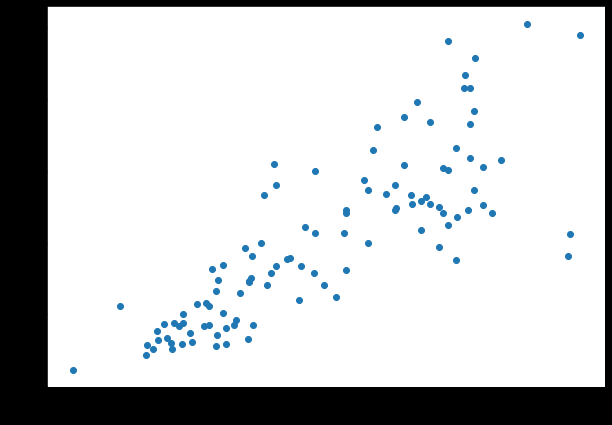

In [82]:
#find correlation by scatterplot visualization
plt.figure(figsize=(10,7),facecolor="black")
plt.scatter(wcat.Waist,wcat.AT)
plt.xlabel("Waist")
plt.ylabel("AT")
plt.show()

In [83]:
lm=LinearRegression()
#reshape for setting data in matrix form as sklearn doesnt accept x y directly
x=wcat["Waist"].values.reshape(109,-1)
y=wcat["AT"].values.reshape(109,-1)
#plot model
reg_sklearn=lm.fit(x,y)
reg_sklearn

LinearRegression()

In [84]:
y

array([[ 25.72],
       [ 25.89],
       [ 42.6 ],
       [ 42.8 ],
       [ 29.84],
       [ 21.68],
       [ 29.08],
       [ 32.98],
       [ 11.44],
       [ 32.22],
       [ 28.32],
       [ 43.86],
       [ 38.21],
       [ 42.48],
       [ 30.96],
       [ 55.78],
       [ 43.78],
       [ 33.41],
       [ 43.35],
       [ 29.31],
       [ 36.6 ],
       [ 40.25],
       [ 35.43],
       [ 60.09],
       [ 45.84],
       [ 70.4 ],
       [ 83.45],
       [ 84.3 ],
       [ 78.89],
       [ 64.75],
       [ 72.56],
       [ 89.31],
       [ 78.94],
       [ 83.55],
       [127.  ],
       [121.  ],
       [107.  ],
       [129.  ],
       [ 74.02],
       [ 55.48],
       [ 73.13],
       [ 50.5 ],
       [ 50.88],
       [140.  ],
       [ 96.54],
       [118.  ],
       [107.  ],
       [123.  ],
       [ 65.92],
       [ 81.29],
       [111.  ],
       [ 90.73],
       [133.  ],
       [ 41.9 ],
       [ 41.71],
       [ 58.16],
       [ 88.85],
       [155.  ],
       [ 70.77

In [85]:
#y= alpha+beta
print(reg_sklearn.coef_) #alpha
print(reg_sklearn.intercept_) #beta

[[3.45885939]]
[-215.98148796]


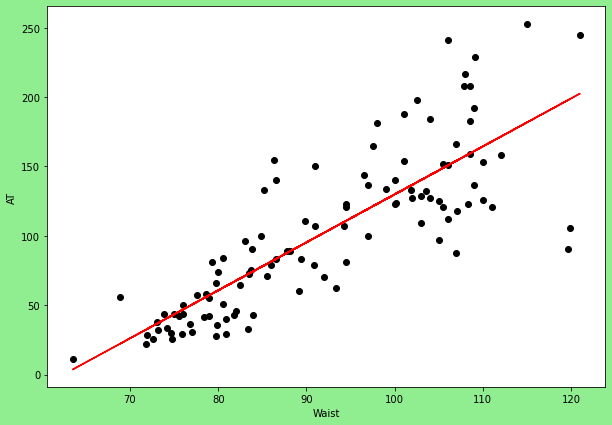

In [86]:
#plot linear regression model
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(wcat.Waist,wcat.AT,color="black")
plt.plot(wcat.Waist,wcat.Waist*reg_sklearn.coef_[0]+reg_sklearn.intercept_,color="red")
plt.xlabel("Waist")
plt.ylabel("AT")
plt.show()

In [87]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


# model validation

In [88]:
pred_train_lm=reg_sklearn.predict(x)
r2_score(wcat["AT"],pred_train_lm) #to check whether the modelis good or not,when r2 is = grater than 
#0.8 then the model is better but here it is 0.6 so there is scope of improvement

0.6700368930528429

# model with statmodel

In [89]:
#data
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [90]:
first_model=smf.ols("AT~Waist",data=wcat).fit()
#pred_statsmodel=first_model.predict(wcat["Waist"])
#r2+score(wcat["AT"],pred_train_lm)

In [91]:
#get all necessary information about model
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           1.62e-27
Time:                        17:29:02   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fitting a Linear Regression Model

In [92]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [93]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [94]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

# Predict for new data point

In [95]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [96]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [97]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64